<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 16: Assessing Models

Associated Textbook Sections: [10.4, 11.0, 11.1](https://inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-16:-Assessing-Models" data-toc-modified-id="Lecture-16:-Assessing-Models-1">Lecture 16: Assessing Models</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Assessing-Models" data-toc-modified-id="Assessing-Models-1.3">Assessing Models</a></span><ul class="toc-item"><li><span><a href="#Models" data-toc-modified-id="Models-1.3.1">Models</a></span></li><li><span><a href="#Approach-to-Assessment" data-toc-modified-id="Approach-to-Assessment-1.3.2">Approach to Assessment</a></span></li></ul></li><li><span><a href="#Jury-Selection" data-toc-modified-id="Jury-Selection-1.4">Jury Selection</a></span><ul class="toc-item"><li><span><a href="#Swain-vs.-Alabama,-1965" data-toc-modified-id="Swain-vs.-Alabama,-1965-1.4.1">Swain vs. Alabama, 1965</a></span></li><li><span><a href="#Supreme-Court-Ruling-(In-English-...-of-the-time)" data-toc-modified-id="Supreme-Court-Ruling-(In-English-...-of-the-time)-1.4.2">Supreme Court Ruling (In English ... of the time)</a></span></li><li><span><a href="#Supreme-Court-Ruling-(in-Data)" data-toc-modified-id="Supreme-Court-Ruling-(in-Data)-1.4.3">Supreme Court Ruling (in Data)</a></span></li><li><span><a href="#Sampling-from-a-Distribution" data-toc-modified-id="Sampling-from-a-Distribution-1.4.4">Sampling from a Distribution</a></span></li><li><span><a href="#Demo:-Swain-vs.-Alabama" data-toc-modified-id="Demo:-Swain-vs.-Alabama-1.4.5">Demo: Swain vs. Alabama</a></span></li></ul></li><li><span><a href="#A-Genetic-Model" data-toc-modified-id="A-Genetic-Model-1.5">A Genetic Model</a></span><ul class="toc-item"><li><span><a href="#Gregor-Mendel,-1822-1884" data-toc-modified-id="Gregor-Mendel,-1822-1884-1.5.1">Gregor Mendel, 1822-1884</a></span></li><li><span><a href="#A-Model" data-toc-modified-id="A-Model-1.5.2">A Model</a></span></li><li><span><a href="#Choosing-a-Statistic" data-toc-modified-id="Choosing-a-Statistic-1.5.3">Choosing a Statistic</a></span></li><li><span><a href="#Demo:-Mendel-and-Pea-Flowers" data-toc-modified-id="Demo:-Mendel-and-Pea-Flowers-1.5.4">Demo: Mendel and Pea Flowers</a></span></li></ul></li><li><span><a href="#Two-Viewpoints" data-toc-modified-id="Two-Viewpoints-1.6">Two Viewpoints</a></span><ul class="toc-item"><li><span><a href="#Model-and-Alternative" data-toc-modified-id="Model-and-Alternative-1.6.1">Model and Alternative</a></span></li><li><span><a href="#Steps-in-Assessing-a-Model" data-toc-modified-id="Steps-in-Assessing-a-Model-1.6.2">Steps in Assessing a Model</a></span></li></ul></li></ul></li></ul></div>

## Assessing Models

### Models

* A model is a set of assumptions about the data
* In data science, many models involve assumptions about processes that involve randomness ("Chance models")
* Key question: Does the model fit the data?

### Approach to Assessment

* If we can simulate data according to the assumptions of the model, we can learn what the model predicts.
* We can then compare the predictions to the data that were observed.
* If the data and the model's predictions are not consistent, that is evidence against the model.

## Jury Selection

### Swain vs. Alabama, 1965

* Talladega County, Alabama
* Robert Swain, Black man convicted of crime
* Appeal: one factor was all-White jury
* Only men 21 years or older were allowed to serve
* 26% of this population were Black
* Swain's jury panel consisted of 100 men
* 8 men on the panel were Black

### Supreme Court Ruling (In English ... of the time)

* About disparities between the percentages in the eligible population and the jury panel, the Supreme Court wrote: 
> "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes"
* The Supreme Court denied Robert Swain’s appeal


### Supreme Court Ruling (in Data)

* Paraphrase: 8/100 is less than 26%, but not different enough to show Black men were systematically excluded
* Question: is 8/100 a realistic outcome if the jury panel selection process were truly unbiased?

### Sampling from a Distribution

* Sample at random from a categorical distribution using `sample_proportions(sample_size, pop_distribution)`
* Samples at random from the population returns an array containing the distribution of the categories in the sample


### Demo: Swain vs. Alabama

Create an 2-valued array that reflects the proportion of the population that is Black and not Black.

In [2]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

Use `sample_proportions` to create the proportions of a sample of size 100 from the population defined by the above array values.

In [6]:
sample_proportions(100, population_proportions)

array([0.29, 0.71])

Define a function to return the proportion Black individuals in a random sample of size 100 from the given population. Visualize the distribution form from calling that function 1000 times.

In [9]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

panel_proportion()

0.31

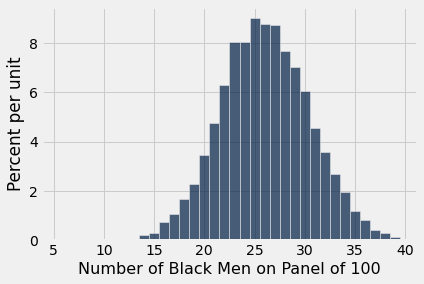

In [10]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

In [11]:
min(panels)

11.0

## A Genetic Model

### Gregor Mendel, 1822-1884

<img src="img/Gregor_Mendel.jpeg" width = 40%>

Image Source: [Wikipedia - Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel)

### A Model

* Pea plants of a particular kind
* Each one has either purple flowers or white flowers
* Mendel’s model: Each plant is purple-flowering with chance 75%, regardless of the colors of the other plants
* Question: Is the model good, or not?


### Choosing a Statistic

* Take a sample, see what percent are purple-flowering
* If that percent is much larger or much smaller than 75, that is evidence against the model
* Distance from 75 is the key
* Statistic: `abs(sample_percent_of_purple_flowering_plants - 75)`
* If the statistic is large, that is evidence against the model


### Demo: Mendel and Pea Flowers

Define the observed proportion of purple flowers in Mendel's data and the predicted population proportions for purple and non-purple flowers.

In [12]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

Simulate sampling 929 plants from a population with the proportions predicted by Mendel.

In [14]:
predicted_proportions = make_array(.75, .25)
predicted_proportions

array([0.75, 0.25])

In [17]:
sample_proportions(929, predicted_proportions)

array([0.75995694, 0.24004306])

Simulate randomly selecting samples of 929 plants based on Mendel's model. Repeat this process 10000 times and visualize the distribution of the sample proportions.

In [18]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100
purple_flowers()

76.64155005382132

In [20]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

Visualize the distribution of the test statistics created from the simulations and identify where the observed statistic fits in the distribution.

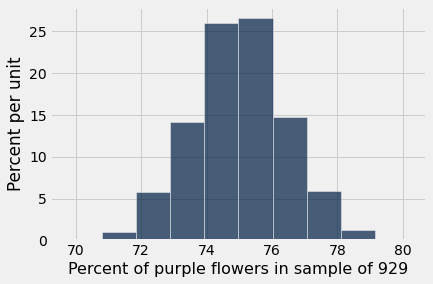

In [21]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [22]:
test_statistics = Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75))
test_statistics

Discrepancy in sample of 929 if the model is true
2.0183
0.511302
2.0183
0.080732
0.888052
2.93326
2.7718
0.457481
0.780409
0.995694


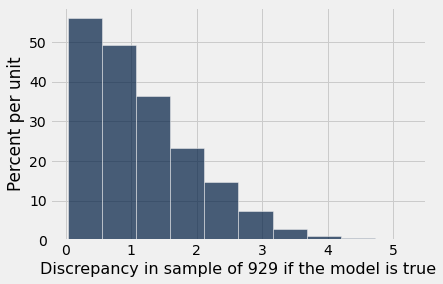

In [23]:
test_statistics.hist()

In [24]:
observed_statistic = abs(observed_purples * 100 - 75)
observed_statistic

1.318622174381062

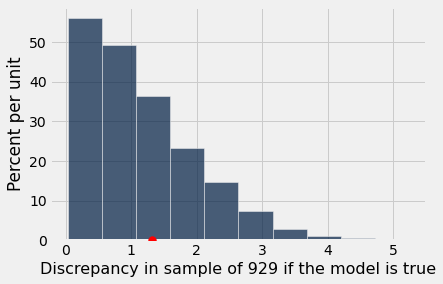

In [25]:
test_statistics.hist()
plots.scatter(observed_statistic, 0, color='red', s=60, zorder=3);

## Two Viewpoints

### Model and Alternative

* Jury selection:
    * Model: The people on the jury panels were selected at random from the eligible population
    * Alternative viewpoint: No, they weren't
* Genetics:
    * Model: Each plant has a 75% chance of having purple flowers
    * Alternative viewpoint: No, it doesn't

### Steps in Assessing a Model

* Choose a statistic to measure discrepancy between model and data
* Simulate the statistic under the model’s assumptions
* Compare the data to the model’s predictions:
    * Draw a histogram of simulated values of the statistic
    * Compute the observed statistic from the real sample
    * If the observed statistic is far from the histogram, that is evidence against the model


<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>